<a href="https://colab.research.google.com/github/murilooon/data-science-projects/blob/main/Push_Ups_Evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Open CSV

In [63]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/push_up_data.csv')
print(df)

     day  push_up_1  push_up_2  push_up_3
0    1-4         21         12          7
1    1-5         21         13          8
2    1-6         22         12          8
3    1-7         24         14         10
4    1-8         25         15         10
5    1-9         25         15         12
6   1-10         26         18         15
7    1-4         21         12          7
8    1-5         21         13          8
9    1-6         22         12          8
10   1-7         24         14         10
11   1-8         25         15         10
12   1-9         25         15         12
13  1-10         26         18         15
14   1-4         21         12          7
15   1-5         21         13          8
16   1-6         22         12          8
17   1-7         24         14         10
18   1-8         25         15         10
19   1-9         25         15         12
20  1-10         26         18         15


## Add average column

In [64]:
col = df.loc[: , "push_up_1":"push_up_3"]
df['push_ups_mean'] = col.mean(axis=1)
print(df)

     day  push_up_1  push_up_2  push_up_3  push_ups_mean
0    1-4         21         12          7      13.333333
1    1-5         21         13          8      14.000000
2    1-6         22         12          8      14.000000
3    1-7         24         14         10      16.000000
4    1-8         25         15         10      16.666667
5    1-9         25         15         12      17.333333
6   1-10         26         18         15      19.666667
7    1-4         21         12          7      13.333333
8    1-5         21         13          8      14.000000
9    1-6         22         12          8      14.000000
10   1-7         24         14         10      16.000000
11   1-8         25         15         10      16.666667
12   1-9         25         15         12      17.333333
13  1-10         26         18         15      19.666667
14   1-4         21         12          7      13.333333
15   1-5         21         13          8      14.000000
16   1-6         22         12 

## Add linear regression

In [87]:
from sklearn.linear_model import LinearRegression

index_x = df.index + 1

X = index_x.values.reshape(-1, 1)
Y = df.iloc[:, 4].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

Y_pred = linear_regressor.predict(X)

df['linear_regression'] = Y_pred

print(df)

     day  push_up_1  push_up_2  push_up_3  push_ups_mean  linear_regression
0    1-4         21         12          7      13.333333          14.753247
1    1-5         21         13          8      14.000000          14.863636
2    1-6         22         12          8      14.000000          14.974026
3    1-7         24         14         10      16.000000          15.084416
4    1-8         25         15         10      16.666667          15.194805
5    1-9         25         15         12      17.333333          15.305195
6   1-10         26         18         15      19.666667          15.415584
7    1-4         21         12          7      13.333333          15.525974
8    1-5         21         13          8      14.000000          15.636364
9    1-6         22         12          8      14.000000          15.746753
10   1-7         24         14         10      16.000000          15.857143
11   1-8         25         15         10      16.666667          15.967532
12   1-9    

## Plot graph

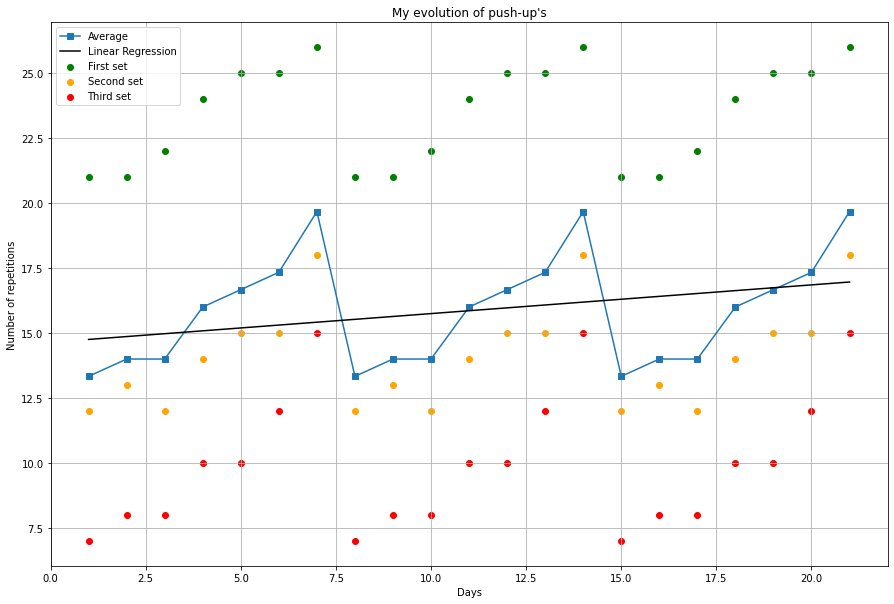

In [88]:
_, ax = plt.subplots(figsize=(15, 10))

ax.scatter(index_x, df['push_up_1'], label='First set', marker='o', color='green')
ax.scatter(index_x, df['push_up_2'], label='Second set', marker='o', color='orange')
ax.scatter(index_x, df['push_up_3'], label='Third set', marker='o', color='red')
ax.plot(index_x, df['push_ups_mean'], label='Average', marker='s',)
ax.plot(index_x, df['linear_regression'], label='Linear Regression', color='black')

ax.set_xlabel('Days')
ax.set_ylabel('Number of repetitions')
ax.set_title("My evolution of push-up's")

plt.legend()
plt.grid()